# End to End Time Series forecasting using ARIMA

In [551]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARMA
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams

In [552]:
# Data and package Import
#Data Source - Kaggle - https://www.kaggle.com/rohanrao/nifty50-stock-market-data

df = pd.read_csv('HCLTECH.csv')
df.Date =  pd.to_datetime(df.Date)
df=df.loc[(df.Date > ('2012-01-02')) & (df.Date <= ('2014-12-31'))]
indexedData = df.set_index(['Date'])
indexedData=indexedData[['Prev Close']]
indexedData.columns = ['sales']
indexedData.sort_index(inplace=True)

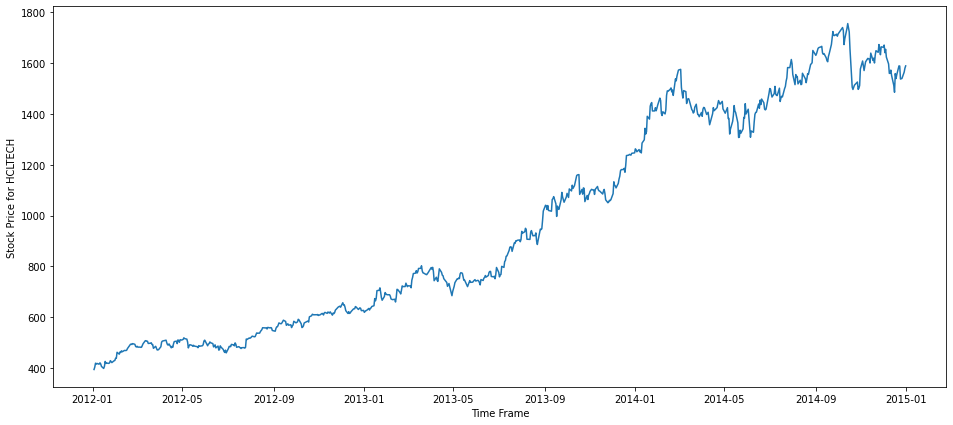

In [553]:
#Data Exploration
plt.figure(figsize=(16,7))
fig = plt.figure(1)
ax1 = fig.add_subplot(111)
ax1.set_xlabel('Time Frame')
ax1.set_ylabel('Stock Price for HCLTECH')
ax1.plot(indexedData['sales'])

In [554]:
#Determining rolling mean & Std
rollmean= indexedData.rolling(window=12).mean()
rollsd = indexedData.rolling(window=12).std()

In [555]:
rollmean,   rollsd

(                  sales
 Date                   
 2012-01-03          NaN
 2012-01-04          NaN
 2012-01-05          NaN
 2012-01-06          NaN
 2012-01-07          NaN
 ...                 ...
 2014-12-24  1550.850000
 2014-12-26  1549.200000
 2014-12-29  1549.529167
 2014-12-30  1550.154167
 2014-12-31  1553.241667
 
 [744 rows x 1 columns],                 sales
 Date                 
 2012-01-03        NaN
 2012-01-04        NaN
 2012-01-05        NaN
 2012-01-06        NaN
 2012-01-07        NaN
 ...               ...
 2014-12-24  29.679592
 2014-12-26  29.705356
 2014-12-29  29.865825
 2014-12-30  30.463864
 2014-12-31  32.483995
 
 [744 rows x 1 columns])

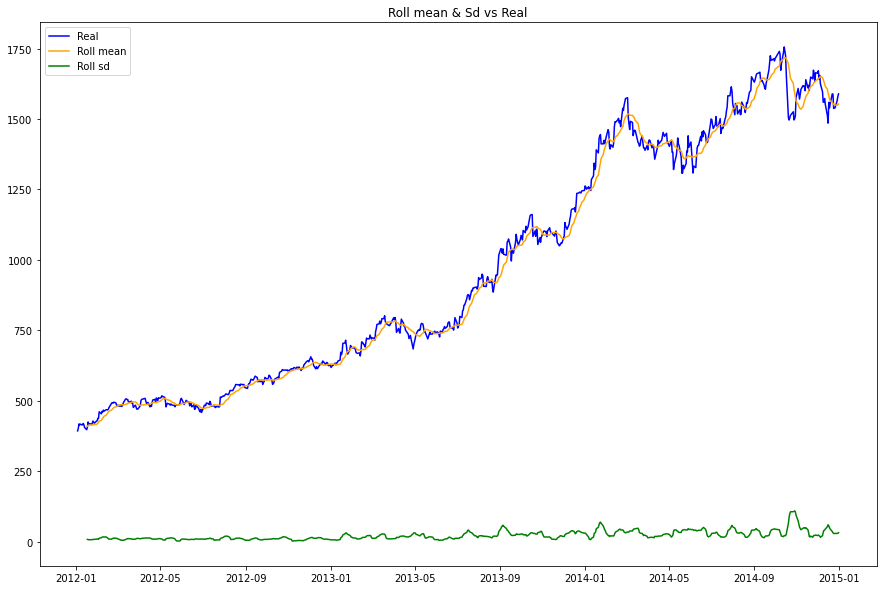

In [556]:
plt.figure(figsize=(15, 10))
Real = plt.plot(indexedData,color='blue',label='Real')
mean =  plt.plot(rollmean,color = 'orange',label= 'Roll mean')
Std =  plt.plot(rollsd,color = 'green',label= 'Roll sd')
plt.legend(loc='best')
plt.title("Roll mean & Sd vs Real")
plt.show()

In [557]:
#Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller

def adfuller_test(sales):
    print("AD FULLER TEST RESULTS")
    result=adfuller(sales,autolag = 'AIC')
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

    

In [558]:
adfuller_test(indexedData)


AD FULLER TEST RESULTS
ADF Test Statistic : -0.3670002649940857
p-value : 0.9154644661939324
#Lags Used : 3
Number of Observations Used : 740
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


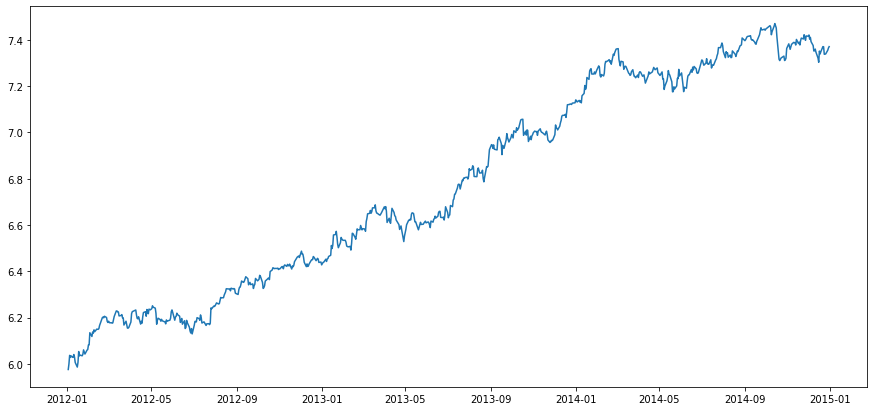

In [559]:
indexedData_log  = np.log(indexedData)
plt.figure(figsize=(15, 7))
plt.plot(indexedData_log)

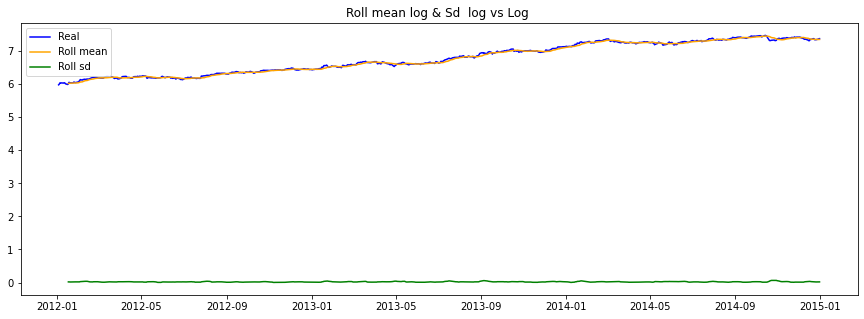

In [560]:
rollmean_log= indexedData_log.rolling(window=12).mean()
rollsd_log = indexedData_log.rolling(window=12).std()
plt.figure(figsize=(15, 5))
Real = plt.plot(indexedData_log,color='blue',label='Real')
mean =  plt.plot(rollmean_log,color = 'orange',label= 'Roll mean')
Std =  plt.plot(rollsd_log,color = 'green',label= 'Roll sd')
plt.legend(loc='best')
plt.title("Roll mean log & Sd  log vs Log ")
plt.show()

In [561]:
indexedData_log_mean = indexedData_log - rollmean_log
indexedData_log_mean.head(15)
indexedData_log_mean.dropna(inplace=True)

In [562]:
def test_stationary(sales):
  movingaverage = sales.rolling(window=12).mean()
  movingstd = sales.rolling(window =12).std()
  plt.figure(figsize=(15, 5))
  Real = plt.plot(sales,color='blue',label='Real')
  mean =  plt.plot(movingaverage,color = 'orange',label= 'Roll mean')
  
  Std =  plt.plot(movingstd,color = 'green',label= 'Roll sd')
  plt.legend(loc='best')
  plt.title("Roll mean  & Sd   vs Real ")
  plt.show()
  adfuller_test(sales)




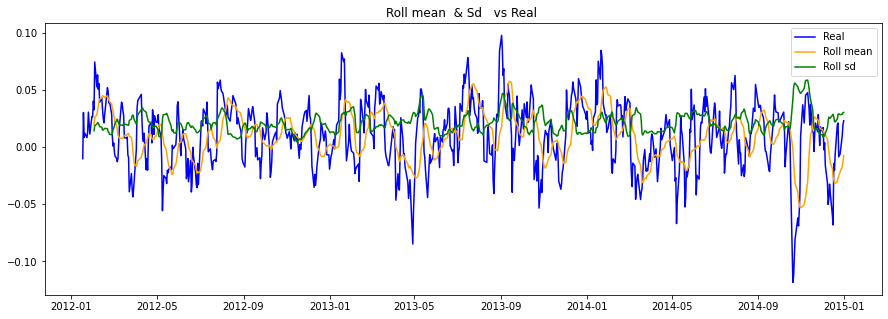

AD FULLER TEST RESULTS
ADF Test Statistic : -6.486153759945413
p-value : 1.2594414338591198e-08
#Lags Used : 10
Number of Observations Used : 722
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [563]:
test_stationary(indexedData_log_mean)

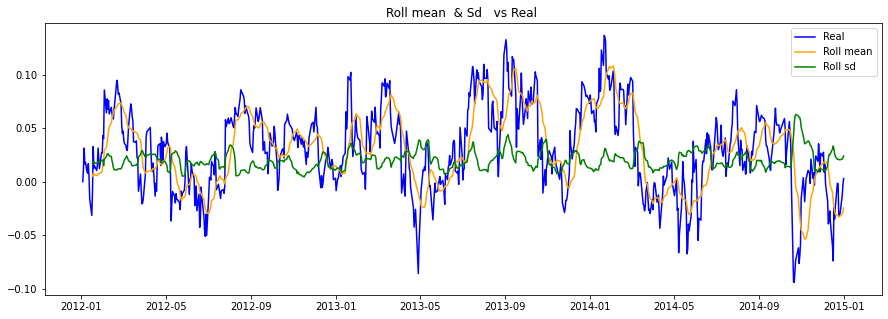

AD FULLER TEST RESULTS
ADF Test Statistic : -5.861995019947951
p-value : 3.393349005950462e-07
#Lags Used : 0
Number of Observations Used : 743
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [564]:
rollwmean_log = indexedData_log.ewm(halflife=12,min_periods = 0,adjust=True).mean()
indexedData_log_w_mean = indexedData_log - rollwmean_log
indexedData_log_w_mean.dropna(inplace=True)
test_stationary(indexedData_log_w_mean)

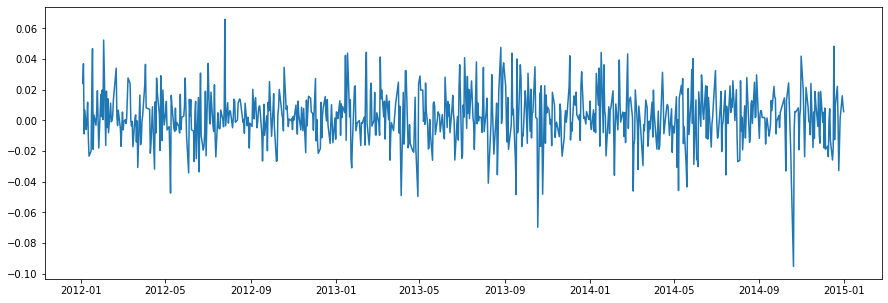

In [565]:
indexedData_log_w_mean_shift = indexedData_log -  indexedData_log.shift()
indexedData_log_w_mean_shift.dropna(inplace=True)
plt.figure(figsize=(15, 5))
plt.plot(indexedData_log_w_mean_shift)


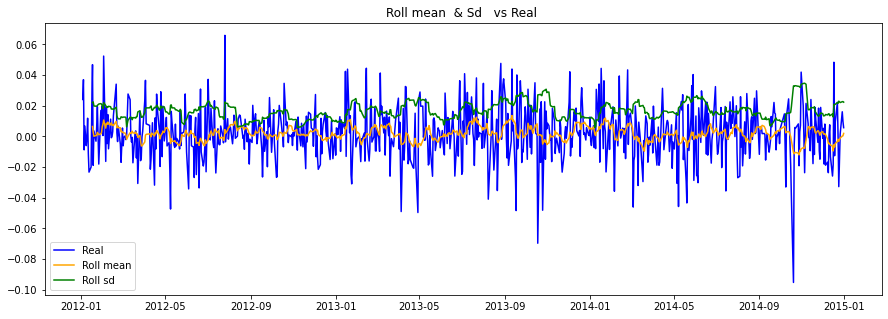

AD FULLER TEST RESULTS
ADF Test Statistic : -17.26750531861881
p-value : 5.8888927630007854e-30
#Lags Used : 2
Number of Observations Used : 740
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [566]:
test_stationary(indexedData_log_w_mean_shift)

In [567]:
indexedData_log_w_mean_shift=indexedData_log_w_mean_shift.reset_index()
indexedData_log_w_mean_shift.Date = pd.to_datetime(indexedData_log_w_mean_shift.Date)
indexedData_log_w_mean_shift.set_index('Date',inplace=True)

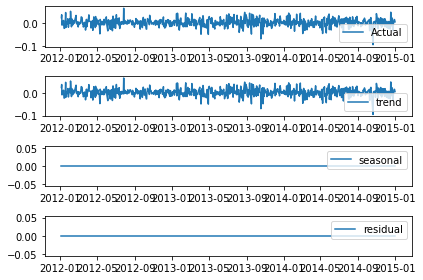

In [568]:
from statsmodels.tsa.seasonal import seasonal_decompose
indexedData_log_w_mean_shift.sort_index(inplace=True)
decomposition = seasonal_decompose(indexedData_log_w_mean_shift,period=1)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(indexedData_log_w_mean_shift,label='Actual')
plt.legend (loc='best')

plt.subplot(412)
plt.plot(trend,label='trend')
plt.legend (loc='best')

plt.subplot(413)
plt.plot(seasonal,label='seasonal')
plt.legend (loc='best')

plt.subplot(414)
plt.plot(residual,label='residual')
plt.legend (loc='best')

plt.tight_layout()


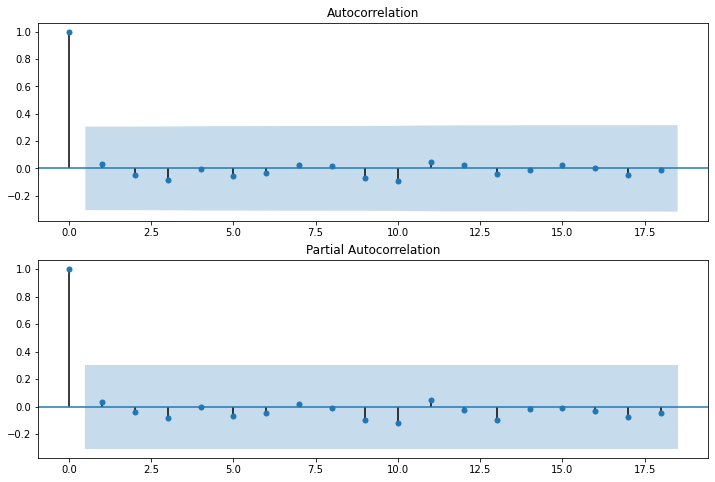

In [569]:
#ACF and PACF

from statsmodels.tsa.stattools import acf,pacf

import statsmodels.api as sm

lag_acf = acf(indexedData_log_w_mean_shift, nlags=40)
lag_pacf = pacf(indexedData_log_w_mean_shift, nlags=40)



fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(lag_acf,ax=ax1,lags=18)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(lag_pacf,ax=ax2,lags=18)

In [570]:
indexedData_log_w_mean_shift['sales']

Date
2012-01-04    0.024098
2012-01-05    0.037005
2012-01-06   -0.008762
2012-01-07    0.006728
2012-01-09   -0.006005
                ...   
2014-12-24   -0.032730
2014-12-26    0.001527
2014-12-29    0.016075
2014-12-30    0.009794
2014-12-31    0.005711
Name: sales, Length: 743, dtype: float64

RSS for q= 0 1.949056
RSS for q= 1 1.506448
RSS for q= 2 1.499768
RSS for q= 3 1.504778


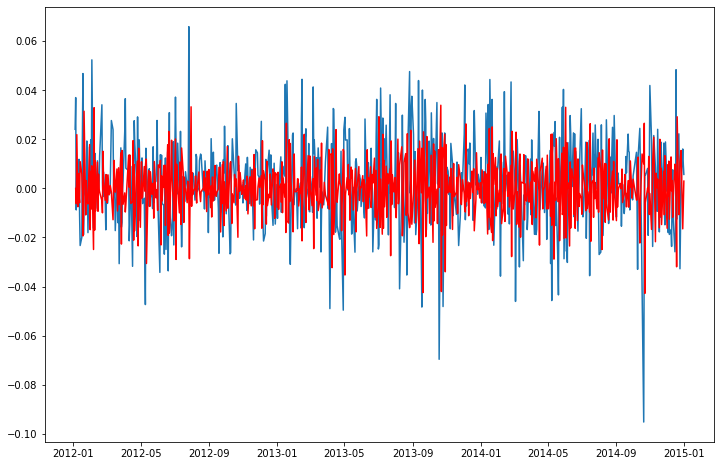

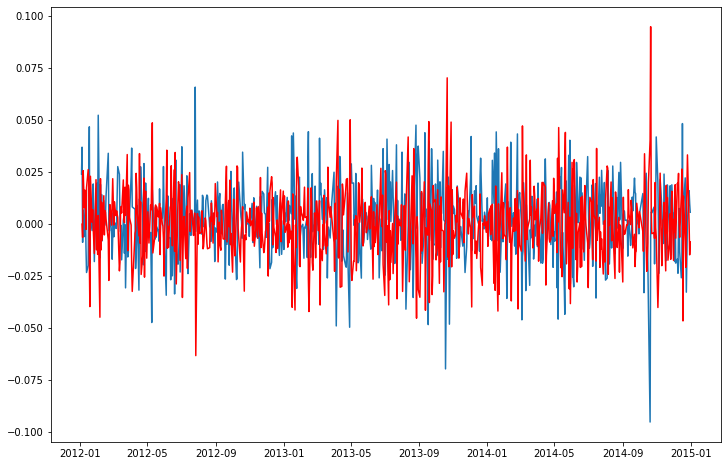

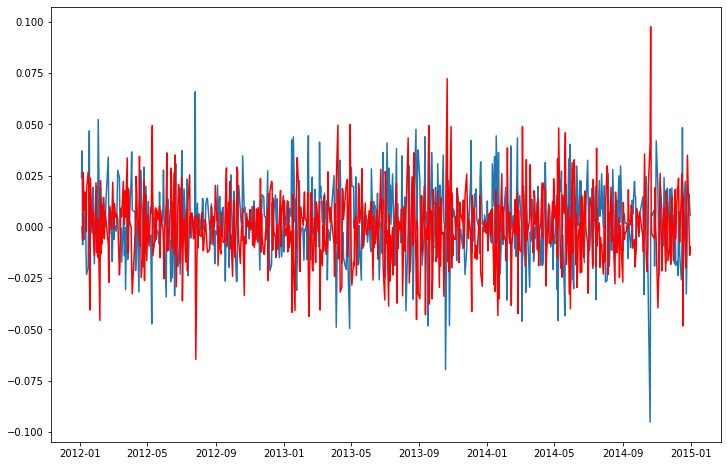

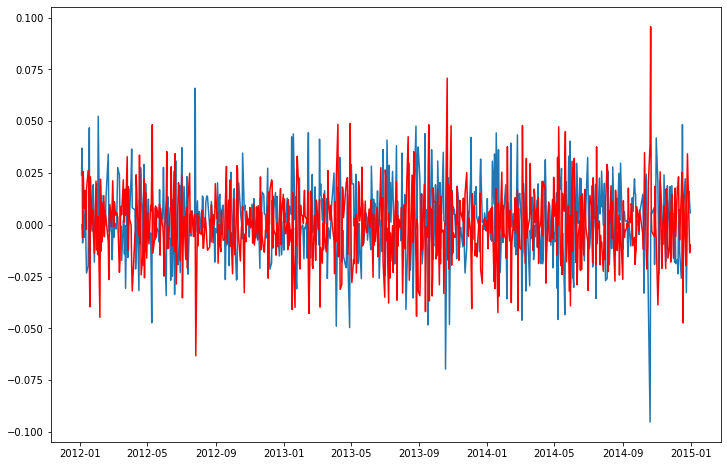

In [571]:
# Training for MA

from statsmodels.tsa.arima_model import ARIMA
for q in [0,1,2,3]:
  model = ARIMA(indexedData_log_w_mean_shift,order = (1,1,q))
  results_AR = model.fit(disp=1)
  plt.figure(figsize=(12,8))
  plt.plot(indexedData_log_w_mean_shift)
  plt.plot(results_AR.fittedvalues,color='red')
  print("RSS for q= "+ str(q),round(sum((results_AR.fittedvalues-indexedData_log_w_mean_shift['sales']).dropna())**2,6))

RSS for q= 0 1.931758
RSS for q= 1 1.949056
RSS for q= 2 1.922727


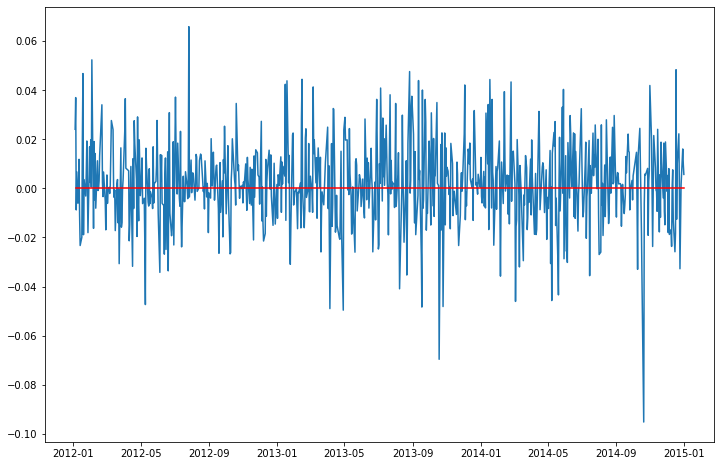

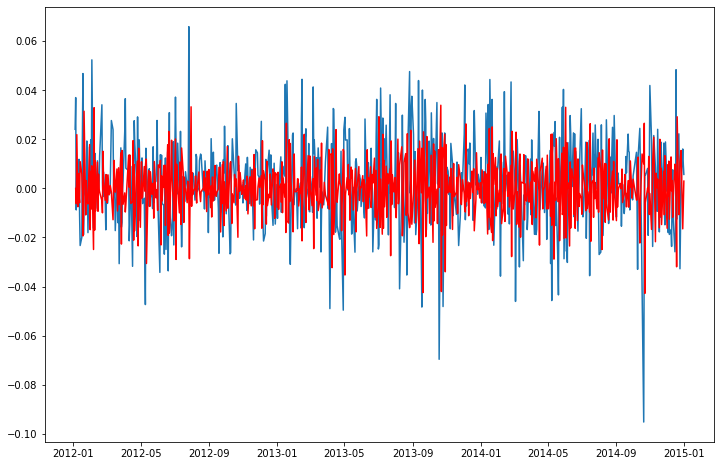

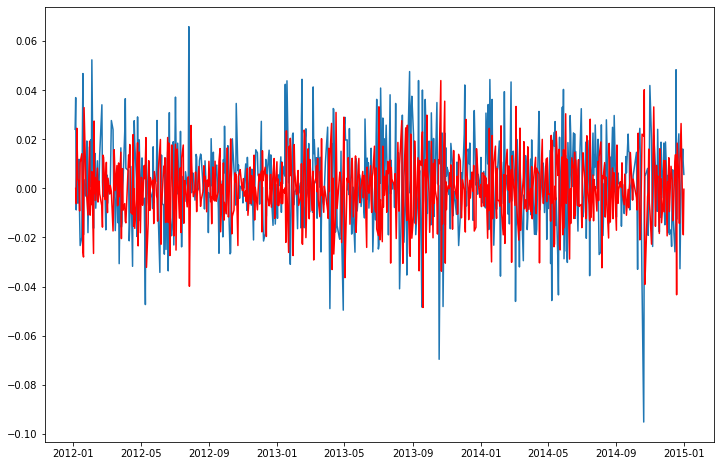

In [572]:
# Training for AR

from statsmodels.tsa.arima_model import ARIMA
for p in [0,1,2]:
  model = ARIMA(indexedData_log_w_mean_shift,order = (p,1,0))
  results_AR = model.fit(disp=1)
  plt.figure(figsize=(12,8))
  plt.plot(indexedData_log_w_mean_shift)
  plt.plot(results_AR.fittedvalues,color='red')
  print("RSS for q= "+ str(p),round(sum((results_AR.fittedvalues-indexedData_log_w_mean_shift['sales']).dropna())**2,6))

RSS for q= 2 1.505693


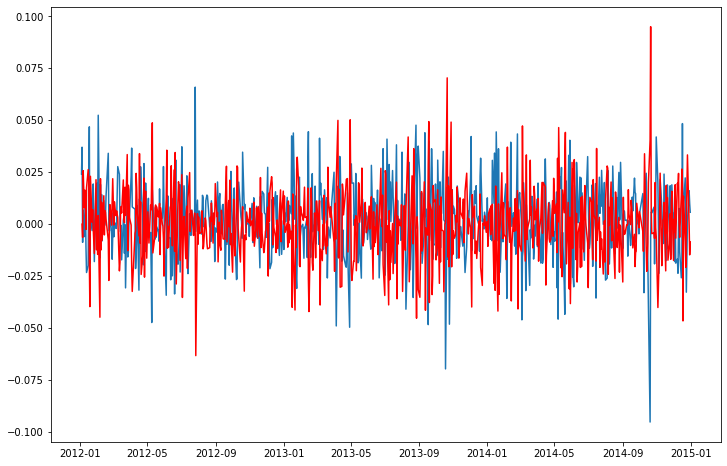

In [607]:
# final model
p= 2
q= 2
model = ARIMA(indexedData_log_w_mean_shift,order = (p,1,q))
results_AR = model.fit(disp=1)
plt.figure(figsize=(12,8))
plt.plot(indexedData_log_w_mean_shift)
plt.plot(results_AR.fittedvalues,color='red')
print("RSS for q= "+ str(p),round(sum((results_AR.fittedvalues-indexedData_log_w_mean_shift['sales']).dropna())**2,6))

In [608]:
pred_arima_df = pd.Series(results_AR.fittedvalues,copy=True)


In [609]:
pred_arima_df_cumsum=pred_arima_df.cumsum()

In [610]:
pre_arima_log = pd.Series(indexedData_log['sales'],index=indexedData_log.index)
pre_arima_log = pre_arima_log.add(pred_arima_df_cumsum,fill_value=0)

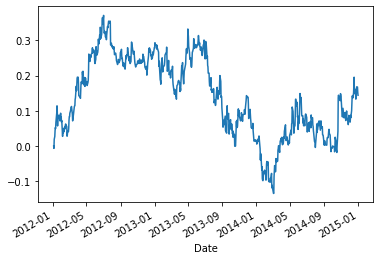

In [611]:
pred_arima_df_cumsum.plot()

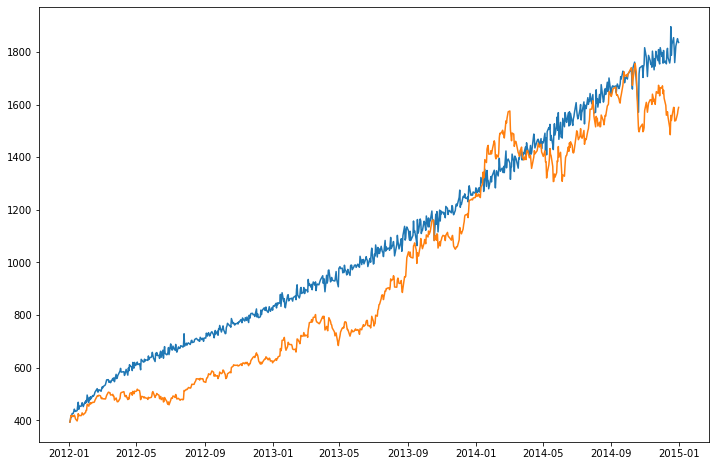

In [614]:
predictions = np.exp(pre_arima_log)
plt.figure(figsize=(12,8))
plt.plot(predictions)
plt.plot(indexedData)